# Homework 6: Double White Dwarf Binaries with LISA

The Cooley-Tukey FFT Algorithm is found in fft.py

In [1]:
%matplotlib inline
import numpy as np
from matplotlib.pyplot import *
from matplotlib import rc
from matplotlib.ticker import FuncFormatter, MultipleLocator
from IPython.display import display, Markdown, Latex
from fft import fft

# Make more readable plots
rc('font',**{'size':14})
rc('xtick',**{'labelsize':16})
rc('ytick',**{'labelsize':16})
rc('axes',**{'labelsize':18,'titlesize':18})

Load in the data file here and plot the results for show.

In [2]:
h = np.load("strain.npy")
N = len(h)
t = np.arange(N)

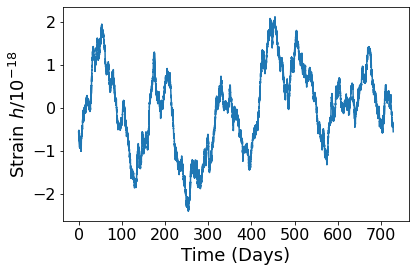

In [3]:
ax = subplot(111)
ax.plot(t/1440.0, h/1e-18)
ax.set_xlabel('Time (Days)')
ax.set_ylabel(r"Strain $h/10^{-18}$")
ax.xaxis.set_major_locator(MultipleLocator(100))
tight_layout()
show()

Now we'll run our calculation for the fft. The default threshold below which it recursively runs the standard DFT calculation is 16 samples, but this can be changed by providing an argument `threshold = value` to the function.

In [4]:
H = fft(h)

Calculate the positive frequencies and the amplitude spectrum. The positive frequencies are given by $f_k = k/T_0$, where $k = 0, 1, \cdots, N/2$ and $T_0$ is the total timespan of the data. Since the samples are taken once per minute, in order to for the frequencies to be in units of Hertz, we will multiply by 60 accordingly to get units of seconds.

In [5]:
# Positive frequencies only
k = np.arange(N//2)
T0 = t[-1]*60 #last time sample in seconds
f_k = k/T0
# Amplitude spectrum:
amps = np.abs(H[:N//2])

Plot of the amplitude spectrum

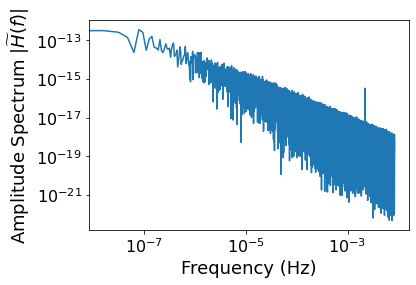

In [6]:
ax = subplot(111)
ax.plot(f_k, amps)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel(r"Amplitude Spectrum $|\widetilde{H}(f)|$")
#ax.xaxis.set_major_locator(MultipleLocator(100))
ax.set_xscale('log')
ax.set_yscale('log')
tight_layout()

We can compare the full FFT to that of `numpy`. The plot of the differences between the two are shown below, where the absolute value is taken since the output FT values are complex.

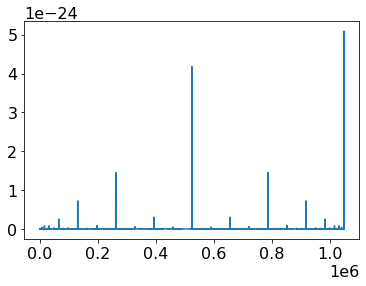

In [7]:
H_np = np.fft.fft(h)
plot(np.abs(H_np - H))

We can see that the values are all extremely close to 0.

-----

With the amplitude spectrum calculated, find the frequency and amplitude of the spike. As noted in the homework prompt, we can convert the amplitude of the spike into strain units by dividing by the number of samples and then multiplying by 2 since this is a one-sided spectrum (positive frequencies only).

In [8]:
inds = np.where(f_k>0.001)[0]
peakind = np.argmax(amps[inds])
peakamp = np.max(amps[inds])/N*2
peakfreq = f_k[inds][peakind]

The equations given that relate the strain and frequency to the physical quantities of the binary are
$$
h  \sim  \frac{(GM)^2}{4\pi^2c^4DR} \approx 2.6 \times 10^{-21}~\left(\frac{M}{M_\odot}\right)^2\left(\frac{D}{\mathrm{pc}}\right)^{-1}\left(\frac{R}{R_\odot}\right)^{-1}.
$$
where $M$ is the total mass of the system, $D$ is the distance to the system (for WD 0727+482, 12 pc), and $R$ is the eparation of the binary. The gravitational wave frequency is given by
$$
f_{\rm GW}  \sim  \frac{1}{2\pi} \left(\frac{GM}{R^3}\right)^{1/2} \approx  10^{-4}~\mathrm{Hz}~\left(\frac{M}{M_\odot}\right)^{1/2}\left(\frac{R}{R_\odot}\right)^{-3/2}.
$$

For easy, I will first define $h_{\rm scaled} = h/2.167 \times 10^{-22}$ (plugging in $D = 12$ pc into the equation above) and $f_{\rm scaled} = f_{\rm GW}/(10^{-4}~\text{Hz})$ to remove the constants out front of the two equations.

In [9]:
h_scaled = peakamp / 2.167e-22
f_scaled = peakfreq/1e-4

We have two equations and two unknowns. We can solve for $M$ by taking the strain equation to the 3/2 power (dropping $M_\odot$ and $R_\odot$ under the assumption that these are the units we're using):
$$
h_{\rm scaled}^{3/2} = M^3 R^{-3/2},
$$
dividing by $f_{\rm scaled} = M^{1/2} R^{-3/2}$ to get
$$
\frac{h_{\rm scaled}^{3/2}}{f_{\rm scaled}} = M^{5/2},
$$
and thus we have that
$$
M = \left(\frac{h_{\rm scaled}^{3/2}}{f_{\rm scaled}}\right)^{2/5}.
$$

We can solve for $R$ similarly by taking the frequency equation to the fourth power:
$$
f_{\rm scaled}^4 = M^2 R^{-6},
$$
dividing the first equation by this to get
$$
\frac{h_{\rm scaled}}{f_{\rm scaled}^4} = R^5,
$$
so that we have
$$
R = \left(\frac{h_{\rm scaled}}{f_{\rm scaled}^4}\right)^{1/5}.
$$ 

Below are the values printed out in Markdown

In [10]:
display(Markdown(r"$f_{\rm GW} = %0.4f~\text{Hz}$"%peakfreq))
display(Markdown((r"$h_{\rm GW} = %0.3e}$"%peakamp).replace("e", " \\times 10^{")))
display(Markdown(r"$M = %0.3f M_\odot$"%np.power(h_scaled**1.5/f_scaled, 2.0/5)))
display(Markdown(r"$R = %0.3f R_\odot$"%np.power(h_scaled/f_scaled**4, 1.0/5)))

$f_{\rm GW} = 0.0022~\text{Hz}$

$h_{\rm GW} = 6.329 \times 10^{-22}$

$M = 0.552 M_\odot$

$R = 0.104 R_\odot$